In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data preparation

In [46]:
file_path = 'park_stats_publish.csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print("Data imported successfully!")
    print(df.head()) 
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Data imported successfully!
                    park_id facility_type_code park_name_korean   area  \
0  11000UQ153PS201912151800             UQT220            양재천공원  19257   
1  11000UQ153PS201912152531             UQT290               공원   5483   
2  11000UQ153PS201912151663             UQT220            바위뫼공원  16386   
3  11650UQ153PS202207110004             UQT220             근린공원   7766   
4  11000UQ153PS202209200005             UQT270            문화공원2  45385   

   boundary_length  administration_code        administration_name3  \
0             1525                11000       Seoul City Government   
1              348                11000       Seoul City Government   
2              520                11000       Seoul City Government   
3              564                11650  Seocho-gu Local Government   
4             1365                11000       Seoul City Government   

        park_type                                           geometry  \
0   Regional park  MULTIPOLY

In [73]:
df

,park_id,facility_type_code,park_name_korean,area,boundary_length,administration_code,administration_name3,park_type,geometry,activity_count,...,std_cadence_per_activity,std_kcal_per_activity,rpa_ratio,rpa_count_zscore,rpa_ratio_zscore,composite_score,rank,neighborhood_park_size,regional_park_size,updated_park_type
0,11000UQ153PS201912151800,UQT220,양재천공원,19257,1525,11000,Seoul City Government,Regional park,MULTIPOLYGON (((127.03944360878462 37.47382501...,3875,...,28.492722,5981.783616,0.257290,6.473514,1.950598,4.212056,1,Not Applicable,"10,001 - 30,000 sqm",NaN
1,11000UQ153PS201912152531,UQT290,공원,5483,348,11000,Seoul City Government,Multi-use park,MULTIPOLYGON (((126.99124580782141 37.49973929...,1974,...,23.006529,4958.714603,0.332320,4.043994,2.927003,3.485498,2,Not Applicable,Not Applicable,Multi-use park
2,11000UQ153PS201912151663,UQT220,바위뫼공원,16386,520,11000,Seoul City Government,Regional park,MULTIPOLYGON (((127.03446005026578 37.47380605...,1402,...,29.011063,4671.623275,0.313124,2.497935,2.677194,2.587564,3,Not Applicable,"10,001 - 30,000 sqm",NaN
3,11650UQ153PS202207110004,UQT220,근린공원,7766,564,11650,Seocho-gu Local Government,Regional park,MULTIPOLYGON (((127.02133665850354 37.49921198...,1190,...,27.989795,4358.084069,0.305882,1.963583,2.582953,2.273268,4,Not Applicable,"Under 10,000 sqm",NaN
4,11000UQ153PS202209200005,UQT270,문화공원2,45385,1365,11000,Seoul City Government,Others,MULTIPOLYGON (((126.99214370899094 37.50623277...,2109,...,31.551295,6164.601079,0.213845,2.583431,1.385226,1.984329,5,Not Applicable,Not Applicable,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,11000UQ153PS202007220073,UQT220,근린공원,63411,2134,11000,Seoul City Government,Regional park,MULTIPOLYGON (((126.9923512779934 37.473466806...,81,...,25.192637,5308.949986,0.012346,-0.622681,-1.236999,-0.929840,162,Not Applicable,"30,001 - 100,000 sqm",NaN
162,11000UQ153PS201912152072,UQT210,언남공원,311,70,11000,Seoul City Government,Children park,MULTIPOLYGON (((127.05476047660059 37.46374406...,1,...,29.838033,4521.750647,0.000000,-0.629806,-1.397660,-1.013733,163,Not Applicable,Not Applicable,Children park
163,11000UQ153PS201912151394,UQT210,안골공원,1184,140,11000,Seoul City Government,Children park,MULTIPOLYGON (((127.06343259201562 37.45603341...,29,...,26.020336,2901.364454,0.000000,-0.629806,-1.397660,-1.013733,163,Not Applicable,Not Applicable,Children park
164,11000UQ153PS202007220024,UQT220,근린공원,49839,1348,11000,Seoul City Government,Regional park,MULTIPOLYGON (((127.06760193225529 37.44386519...,2,...,25.915218,2923.654599,0.000000,-0.629806,-1.397660,-1.013733,163,Not Applicable,"30,001 - 100,000 sqm",NaN


# Analysis

In [74]:
park_type_stats = df.groupby('park_type').agg(
    number_of_parks=('park_id', 'count'),
    average_area=('area', 'mean'),
    std_dev_area=('area', 'std')
).reset_index()

In [75]:
park_type_stats.rename(columns={'park_type': 'Park Type'}, inplace=True)
park_type_order = [
    'Regional park', 'Multi-use park', 'Others', 
    'Children park', 'Sports park', 'Cemetery park'
]
park_type_stats['Park Type'] = pd.Categorical(park_type_stats['Park Type'], categories=park_type_order, ordered=True)
park_type_stats = park_type_stats.sort_values('Park Type')

In [76]:
park_type_stats['average_area'] = park_type_stats['average_area'].round(2)
park_type_stats['std_dev_area'] = park_type_stats['std_dev_area'].round(2)

In [77]:
park_type_stats

,Park Type,number_of_parks,average_area,std_dev_area
4,Regional park,40,52054.40,128229.02
2,Multi-use park,24,4468.96,5191.41
3,Others,29,7577.76,13284.48
1,Children park,71,1862.70,1572.23
5,Sports park,1,21004.00,NaN
0,Cemetery park,1,27682.00,NaN


In [78]:
def classify_regional_park(area):
    if area <= 10000:
        return 'Under 10,000 sqm'
    elif 10001 <= area <= 30000:
        return '10,001 - 30,000 sqm'
    elif 30001 <= area <= 100000:
        return '30,001 - 100,000 sqm'
    else:
        return 'Over 100,000 sqm'
df['regional_park_size'] = df.apply(
    lambda row: classify_regional_park(row['area']) if row['park_type'] == 'Regional park' else 'Not Applicable',
    axis=1
)
regional_park_stats = df[df['park_type'] == 'Regional park'].groupby('regional_park_size').agg(
    number_of_parks=('park_id', 'count'),
    average_area=('area', 'mean'),
    std_dev_area=('area', 'std')
).reset_index()
regional_park_stats['average_area'] = regional_park_stats['average_area'].round(2)
regional_park_stats['std_dev_area'] = regional_park_stats['std_dev_area'].round(2)
regional_park_stats

,regional_park_size,number_of_parks,average_area,std_dev_area
0,"10,001 - 30,000 sqm",10,17091.40,5954.75
1,"30,001 - 100,000 sqm",6,54730.33,15836.86
2,"Over 100,000 sqm",4,377438.50,228713.82
3,"Under 10,000 sqm",20,3656.30,2786.86


In [79]:
metrics = ['rpa_activity_count', 'rpa_ratio', 'composite_score']
titles = ['Distribution of RPA Count by Park Type',
          'Distribution of RPA Ratio by Park Type',
          'Distribution of Composite Scores by Park Type']

C:\Users\cdsn\AppData\Local\Temp\ipykernel_10528\2407395943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=metric, y='park_type', palette="gray", showfliers=True)
C:\Users\cdsn\AppData\Local\Temp\ipykernel_10528\2407395943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=metric, y='park_type', palette="gray", showfliers=True)
C:\Users\cdsn\AppData\Local\Temp\ipykernel_10528\2407395943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=metric, y='park_type', palette="gray", showfliers=True)


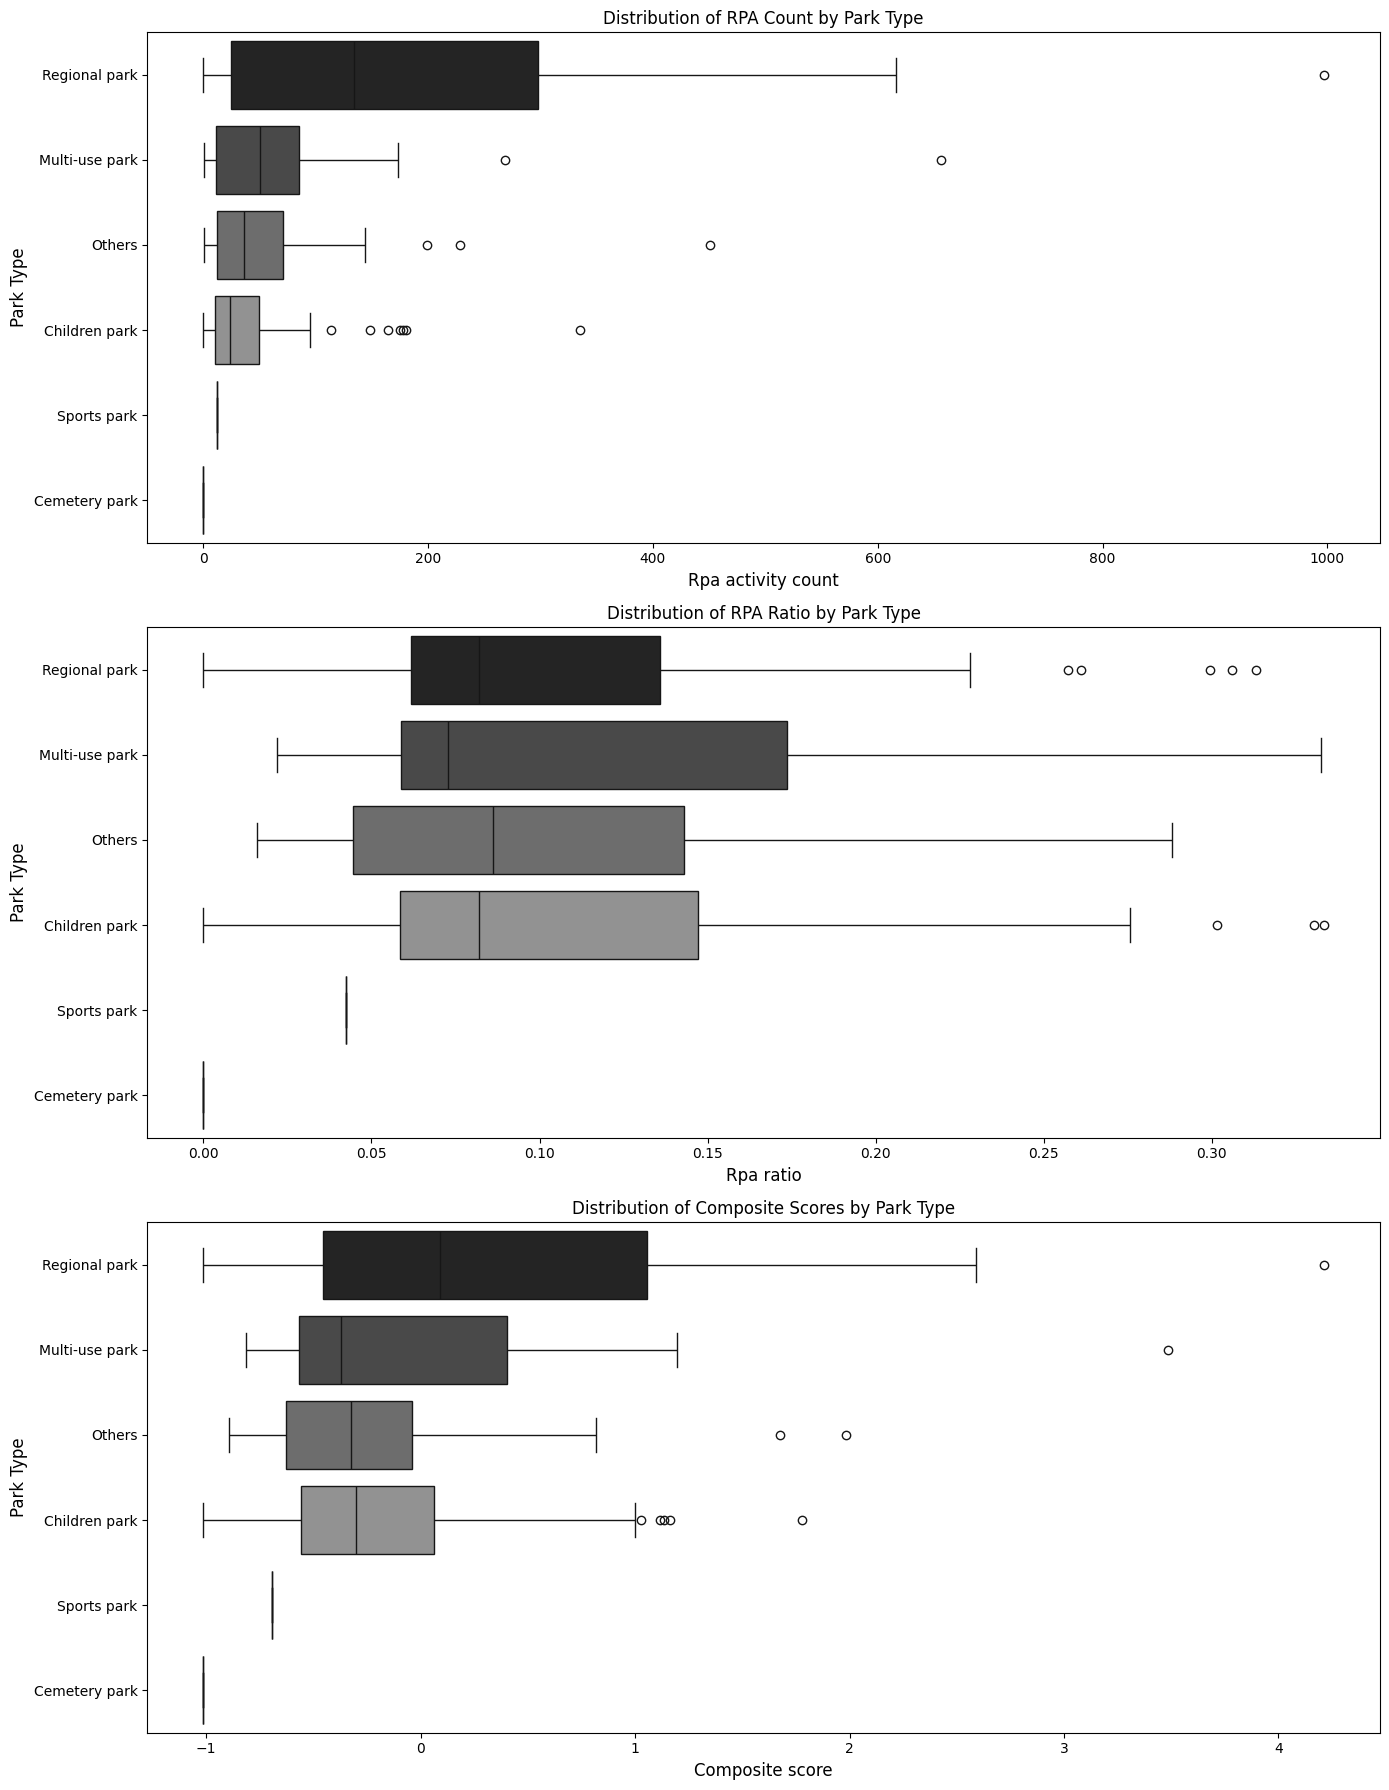

In [80]:
plt.figure(figsize=(14, 18))

# Loop through the metrics and create a box plot for each
for i, (metric, title) in enumerate(zip(metrics, titles), 1):
    plt.subplot(3, 1, i)  # Create a subplot for each metric
    sns.boxplot(data=df, x=metric, y='park_type', palette="gray", showfliers=True)
    plt.title(title, fontsize=12)
    plt.xlabel(metric.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel('Park Type', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [86]:
custom_order = [
    'Regional park (Under 10,000 sqm)', 
    'Regional park (10,001 - 30,000 sqm)', 
    'Regional park (30,001 - 100,000 sqm)', 
    'Regional park (Over 100,000 sqm)',
    'Multi-use park', 
    'Others', 
    'Children park', 
    'Sports park', 
    'Cemetery park'
]

# Update park type to match the custom order
df['updated_park_type'] = df.apply(
    lambda row: (
        f"Regional park ({classify_regional_park(row['area'])})" 
        if row['park_type'] == 'Regional park' 
        else row['park_type']
    ),
    axis=1
)

# Set the updated_park_type column as a categorical variable with the custom order
df['updated_park_type'] = pd.Categorical(df['updated_park_type'], categories=custom_order, ordered=True)


C:\Users\cdsn\AppData\Local\Temp\ipykernel_10528\3865262959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=metric, y='updated_park_type', palette="gray", showfliers=True)
C:\Users\cdsn\AppData\Local\Temp\ipykernel_10528\3865262959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=metric, y='updated_park_type', palette="gray", showfliers=True)
C:\Users\cdsn\AppData\Local\Temp\ipykernel_10528\3865262959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=metric, y='updated_park_type', palette="gray", sho

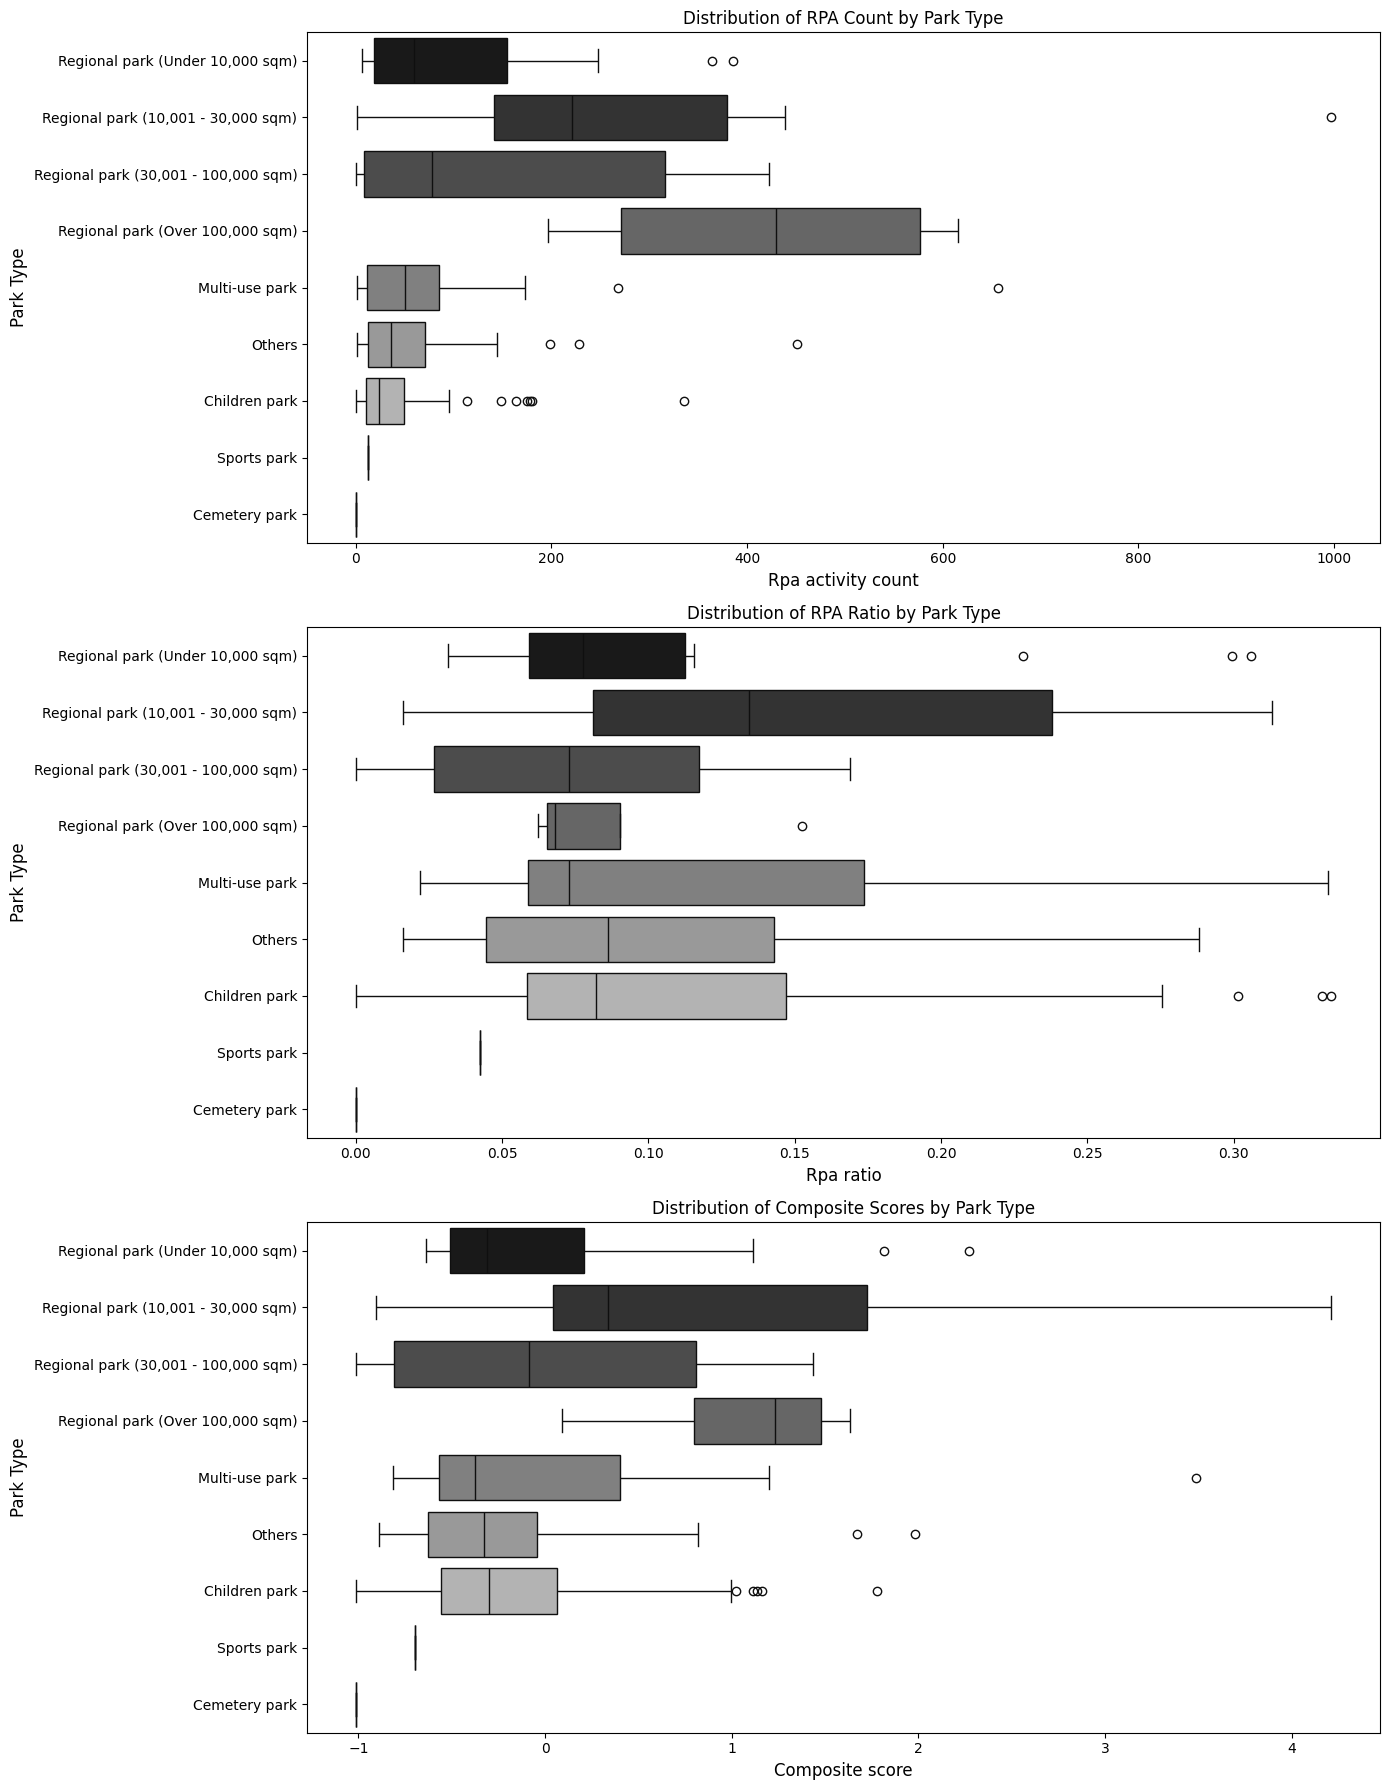

In [87]:
plt.figure(figsize=(14, 18))

# Loop through the metrics and create a box plot for each
for i, (metric, title) in enumerate(zip(metrics, titles), 1):
    plt.subplot(3, 1, i)  # Create a subplot for each metric
    sns.boxplot(data=df, x=metric, y='updated_park_type', palette="gray", showfliers=True)
    plt.title(title, fontsize=12)
    plt.xlabel(metric.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel('Park Type', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()